In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [64]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [65]:
df.duplicated().sum()

np.int64(0)

# Preprocess the data

### 1. Investigate variables like Dt_Customer and Income, etc., and check if they are imported correctly.

In [66]:
# Clean up column names that contain whitespace
#df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.strip()

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [68]:
# Transform income column to a numerical
df['Income'] = df['Income'].str.replace('$', '').str.replace(',','').astype(float)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### 2. Income values for a few customers are missing. Perform missing value imputation. 

In [70]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [71]:
grouped_mean = df.groupby(['Education', 'Marital_Status'])['Income'].transform('mean')
grouped_mean

0       54526.042017
1       51322.182927
2       50800.258741
3       55758.480702
4       51322.182927
            ...     
2235    53096.615385
2236    46201.100000
2237    54526.042017
2238    50800.258741
2239    58138.031579
Name: Income, Length: 2240, dtype: float64

In [72]:
df['Income'] = df['Income'].fillna(grouped_mean).fillna(df['Income'].mean().round(2))

In [73]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

### 3. Create variables to represent the total number of children, age, total purchase and total spending.

In [74]:
import datetime
#Age
df['Age'] = datetime.datetime.now().year-df['Year_Birth']
#Total No of children
df['Total_No_Children'] = df['Kidhome']+df['Teenhome']
#Total spending
df['Total_Spending'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)
#Total purchase
df['Total_purchase'] = df[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total_No_Children,Total_Spending,Total_purchase
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,55,0,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,64,0,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,67,1,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,58,2,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,36,1,91,8


In [75]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age',
       'Total_No_Children', 'Total_Spending', 'Total_purchase'],
      dtype='object')

### 4. Create box plots and histograms to understand the distributions and outliers. Perform outlier treatment.

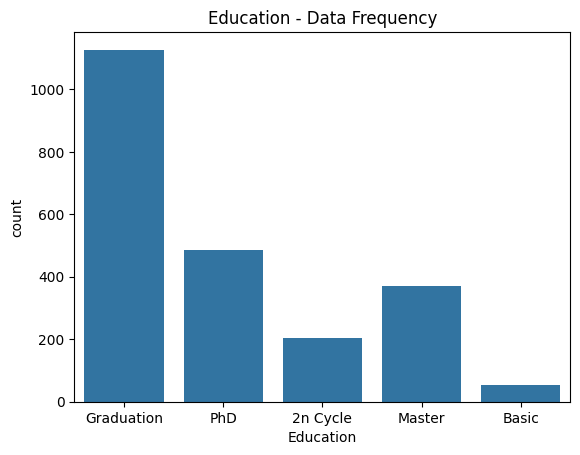

Number of samples according to Education
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [76]:
#Education countplot
sn.countplot(x='Education', data=df)
plt.title('Education - Data Frequency')
plt.xlabel('Education')
plt.show()
print('Number of samples according to Education\n', df['Education'].value_counts())

In [77]:
df['Education'] = df['Education'].replace({'2n Cycle': 'Master', 
                                          'Graduation': 'Undergraduation'})

In [78]:
pd.unique(df['Education'])

array(['Undergraduation', 'PhD', 'Master', 'Basic'], dtype=object)

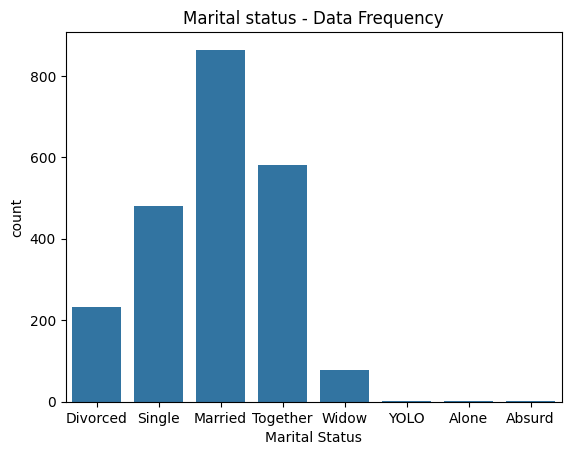

No of samples according to Marital Status
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


In [79]:
#Marital Status
sn.countplot(x='Marital_Status', data=df)
plt.title('Marital status - Data Frequency')
plt.xlabel('Marital Status')
plt.show()

print('No of samples according to Marital Status\n', df['Marital_Status'].value_counts())

In [80]:
df['Marital_Status'] = df['Marital_Status'].replace({'Alone':'Single', 'YOLO':'Single', 'Absurd':'Single'})

In [81]:
pd.unique(df['Marital_Status'])

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

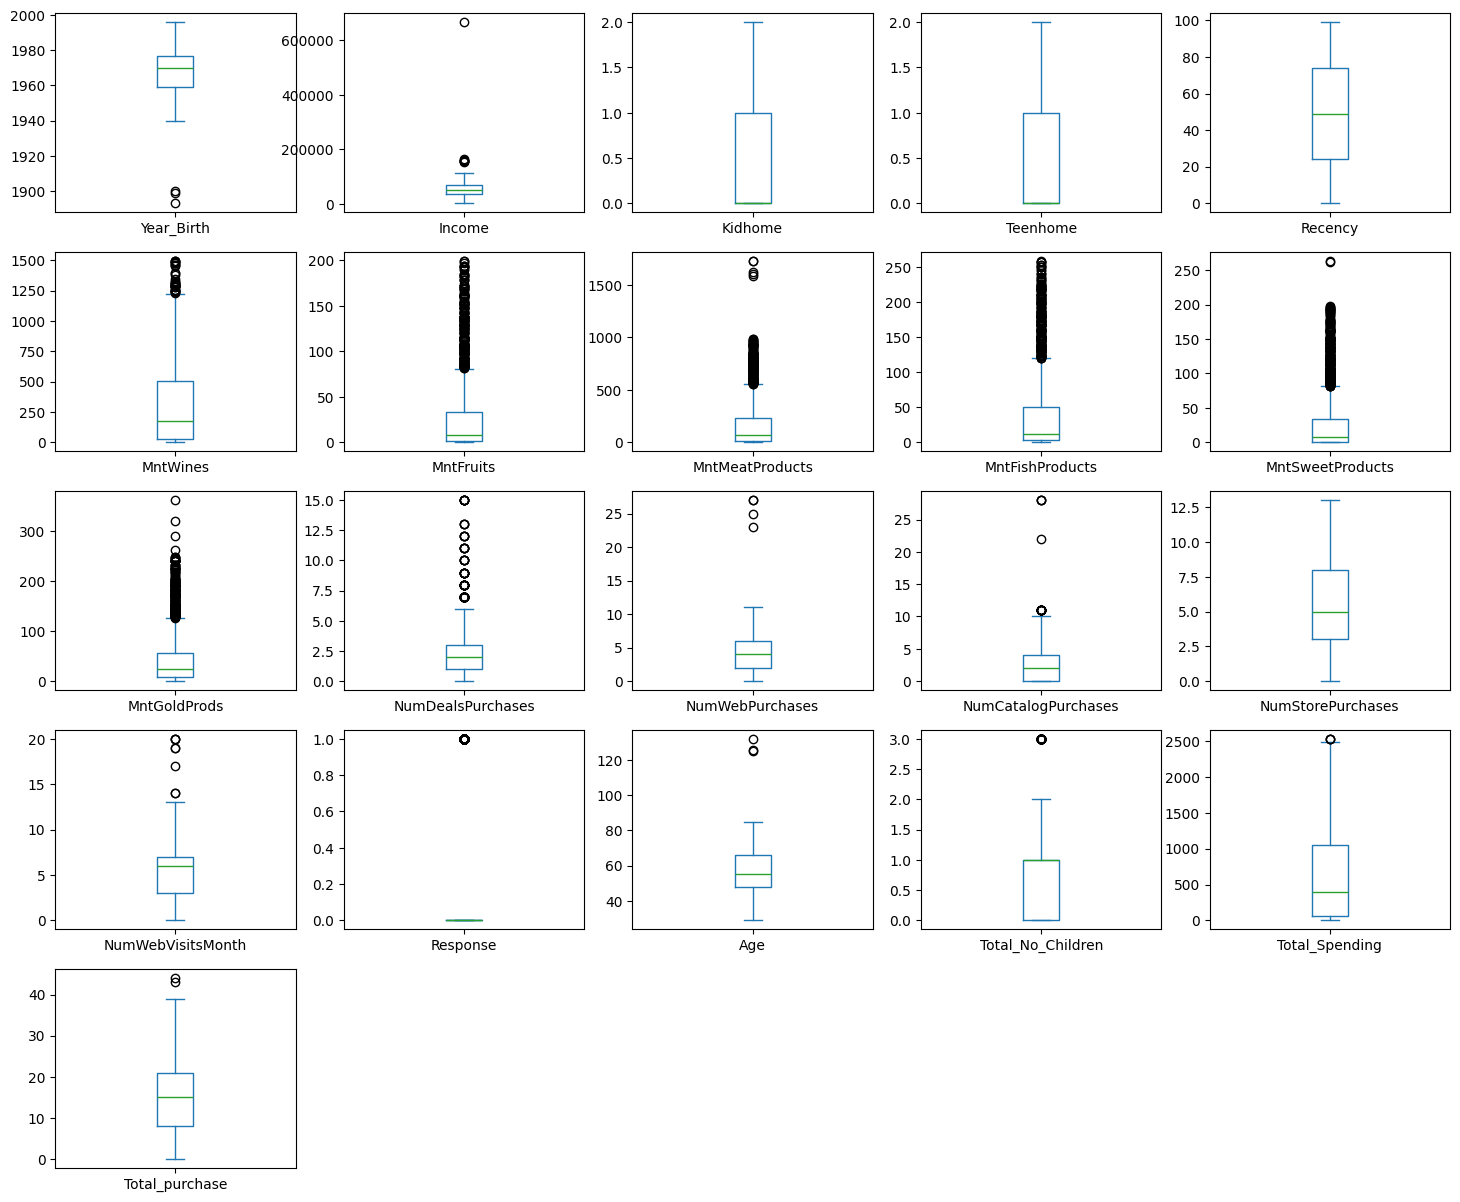

In [82]:
df2 = df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2','ID', 'Complain'],axis=1)
numerical_col = df2.select_dtypes(include=['number']).columns
df[numerical_col].plot(subplots=True, layout=(5,5), kind='box', figsize=(18,15))
plt.show()

<Axes: >

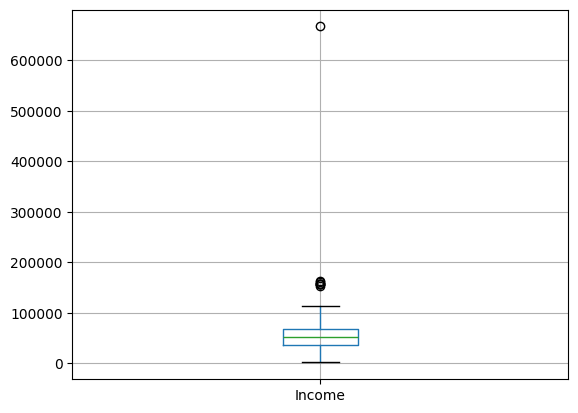

In [83]:
df.boxplot('Income')

<Axes: >

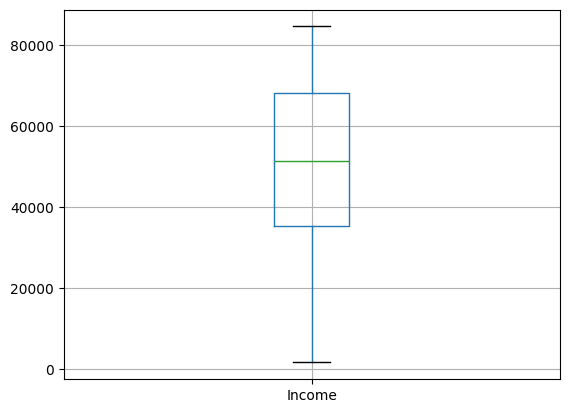

In [84]:
#Treating outliers from income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q1 + 1.5*IQR
df['Income'].mask(df['Income'] > UB, UB, inplace=True)
df.boxplot('Income')

<Axes: >

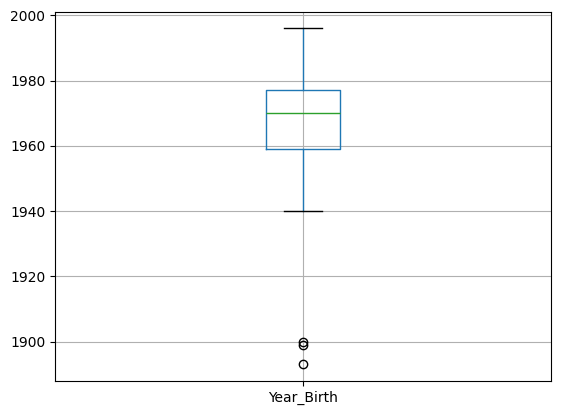

In [85]:
df.boxplot('Year_Birth')

<Axes: >

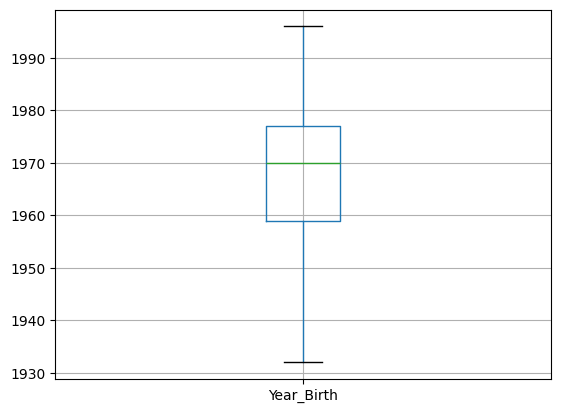

In [90]:
#Treating outlier
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3-Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR
df['Year_Birth'].mask(df['Year_Birth']<LB, LB, inplace=True)
df.boxplot('Year_Birth')

<Axes: xlabel='Income', ylabel='Density'>

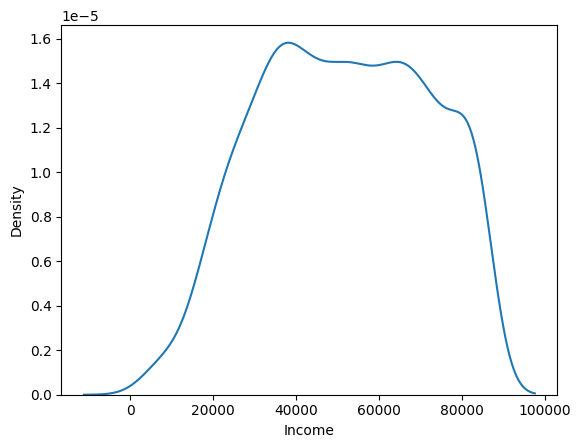

In [92]:
# Distribution of Income
sn.kdeplot(data=df, x="Income")

### 5. Apply ordinal and one-hot encoding based on the various types of categorical variables.


In [96]:
#For education use Label enconding
order = {'Basic': 0, 'Undergraduation': 1,  'Master': 2, 'PhD': 3}
df['Education1'] = df['Education'].map(order)

#from sklearn.preprocessing import OrdinalEncoder
#df["Education1"] = OrdinalEncoder().fit_transform(df[["Education"]])
#Since label order is not correct use this

In [98]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total_No_Children,Total_Spending,Total_purchase,Education1
0,1826,1970,Undergraduation,Divorced,84665.25,0,0,2014-06-16,0,189,...,0,0,1,0,SP,55,0,1190,15,1
1,1,1961,Undergraduation,Single,57091.00,0,0,2014-06-15,0,464,...,0,1,1,0,CA,64,0,577,18,1
2,10476,1958,Undergraduation,Married,67267.00,0,1,2014-05-13,0,134,...,0,0,0,0,US,67,1,251,11,1
3,1386,1967,Undergraduation,Together,32474.00,1,1,2014-05-11,0,10,...,0,0,0,0,AUS,58,2,11,4,1
4,5371,1989,Undergraduation,Single,21474.00,1,0,2014-04-08,0,6,...,0,0,1,0,SP,36,1,91,8,1


In [100]:
# for categorical variables use OneHotEncoder
df = pd.get_dummies(df, columns=['Marital_Status'])
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Age,Total_No_Children,Total_Spending,Total_purchase,Education1,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1826,1970,Undergraduation,84665.25,0,0,2014-06-16,0,189,104,...,55,0,1190,15,1,True,False,False,False,False
1,1,1961,Undergraduation,57091.00,0,0,2014-06-15,0,464,5,...,64,0,577,18,1,False,False,True,False,False
2,10476,1958,Undergraduation,67267.00,0,1,2014-05-13,0,134,11,...,67,1,251,11,1,False,True,False,False,False
3,1386,1967,Undergraduation,32474.00,1,1,2014-05-11,0,10,0,...,58,2,11,4,1,False,False,False,True,False
4,5371,1989,Undergraduation,21474.00,1,0,2014-04-08,0,6,16,...,36,1,91,8,1,False,False,True,False,False


### 6. Generate a heatmap to illustrate the correlation between different pairs of variables.

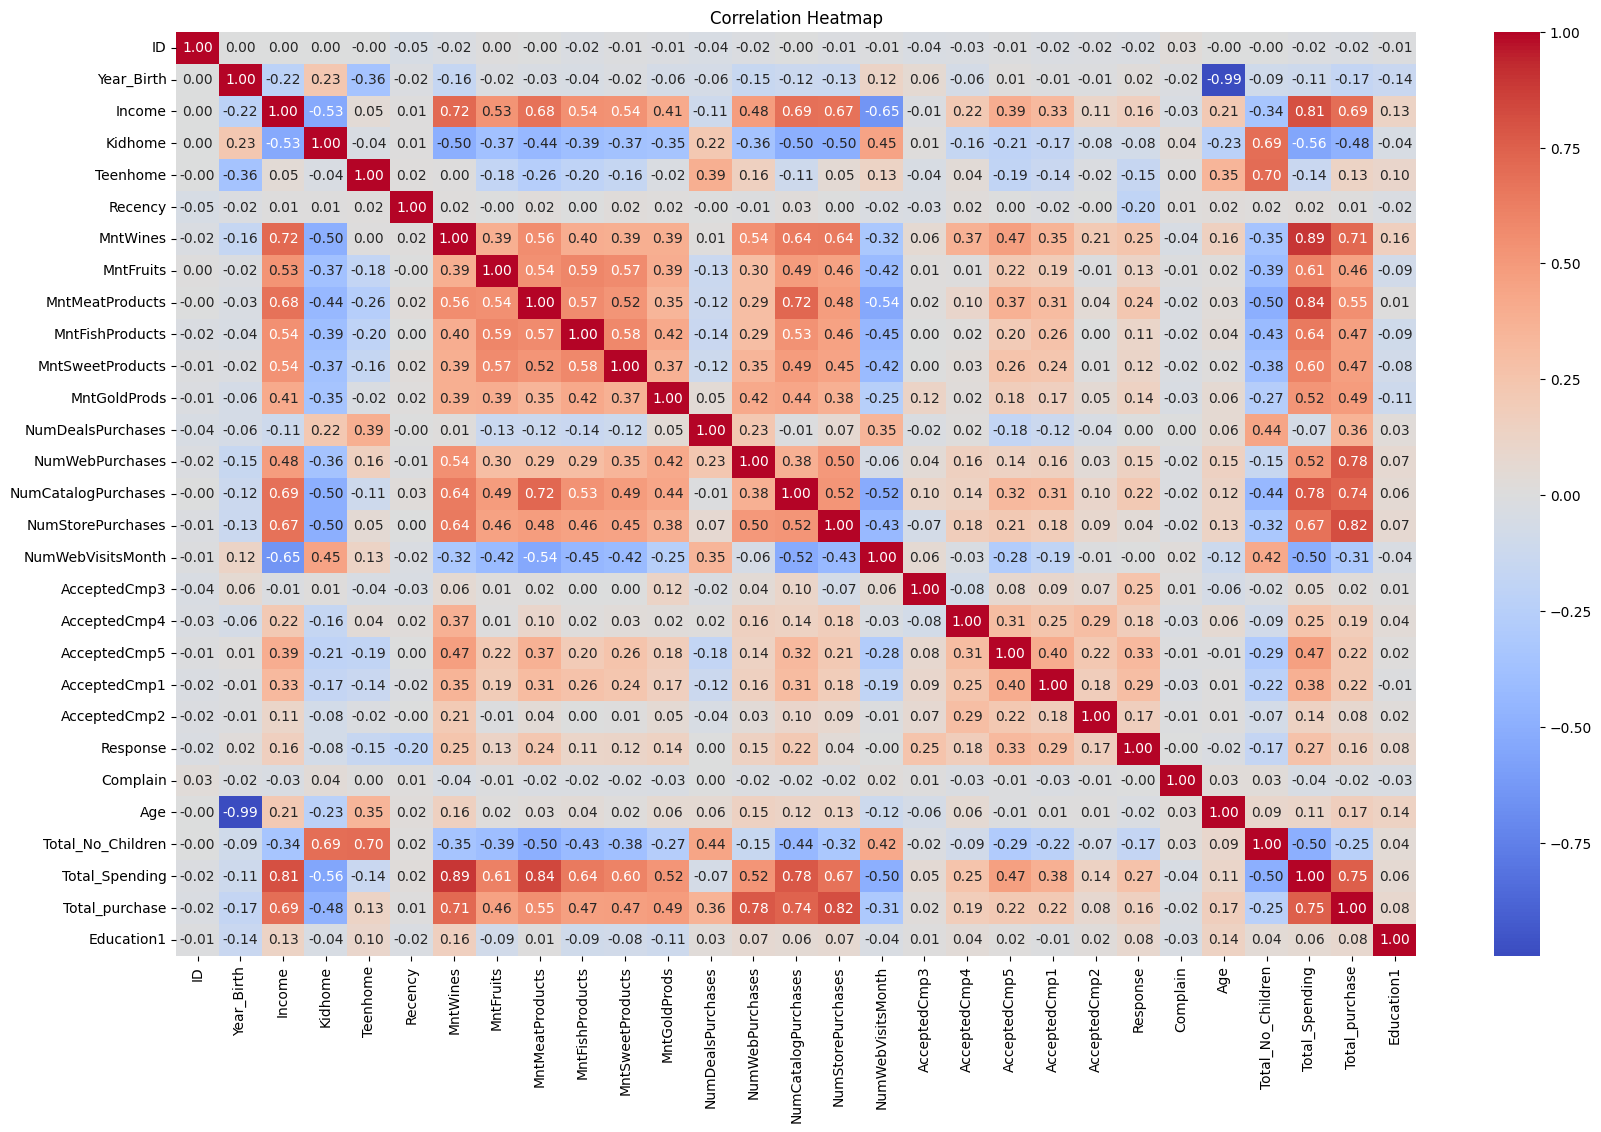

Correlation with 'Response':
 Response               1.000000
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
Total_Spending         0.265298
AcceptedCmp3           0.254258
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
AcceptedCmp4           0.177019
AcceptedCmp2           0.169293
Income                 0.160953
Total_purchase         0.155138
NumWebPurchases        0.148730
MntGoldProds           0.139850
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
Education1             0.084625
NumStorePurchases      0.039363
Year_Birth             0.020058
NumDealsPurchases      0.002238
Complain              -0.001707
NumWebVisitsMonth     -0.003987
Age                   -0.021325
ID                    -0.021968
Kidhome               -0.080008
Teenhome              -0.154446
Total_No_Children     -0.169163
Recency               -0.198437
Name: Response, dtype: float64


In [106]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(20,12))
sn.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Check correlation of all features with 'Response'
# Make sure 'Response' is in the numeric columns
if 'Response' in numeric_df.columns:
    response_corr = corr['Response'].sort_values(ascending=False)
    print("Correlation with 'Response':\n", response_corr)
else:
    print("'Response' is not a numeric column or not present in the DataFrame.")

### 7. Test the following hypotheses:

#### 1. Older individuals may not possess the same level of technological proficiency and may lean toward traditional in-store shopping preferences.

<Axes: xlabel='Age_Group'>

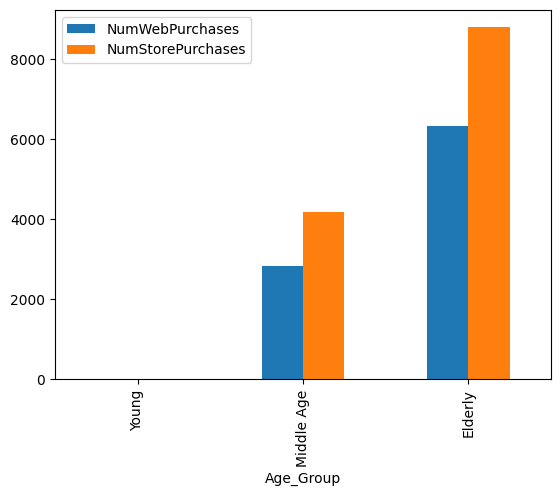

In [117]:
df_age = df[['Age','NumWebPurchases','NumStorePurchases']].copy()

df_age['Age_Group'] = pd.cut(
    df_age['Age'],
    bins=[0, 25, 50, 120],         # ranges
    labels=['Young', 'Middle Age', 'Elderly']  # labels
)

df_age_plot = df_age.groupby("Age_Group")[['NumWebPurchases','NumStorePurchases']].sum()
df_age_plot.plot.bar()

#### 2. Customers with kids probably have less time to visit a store and would prefer to shop online.

<Axes: xlabel='Total_No_Children'>

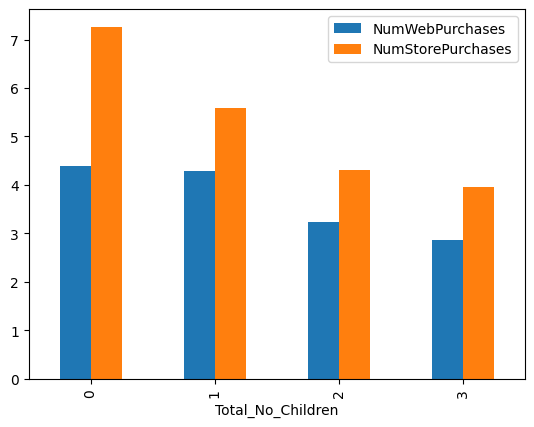

In [122]:
df_kids = df[['Total_No_Children','NumWebPurchases','NumStorePurchases']]
df_kids_grp = df_kids.groupby('Total_No_Children')[['NumWebPurchases','NumStorePurchases']].agg('mean')
df_kids_grp.plot.bar()

#### 3. Other distribution channels may cannibalize sales at the store.

In [123]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Total_No_Children',
       'Total_Spending', 'Total_purchase', 'Education1',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

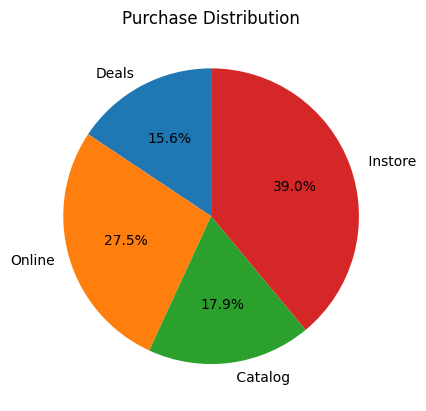

In [128]:
sizes = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases']].sum()
labels = ['Deals', 'Online', ' Catalog', ' Instore']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Purchase Distribution')
plt.show()

#### 4. Does the US fare significantly better than the rest of the world in terms of total purchases?

In [129]:
totalpurchases = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Country']]
totalpurchases.head(1)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Country
0,1,4,4,6,SP


In [130]:
# Calculate the total number of purchases made through different channels
totalpurchases['TotalPurchases'] = totalpurchases['NumDealsPurchases'] + totalpurchases['NumWebPurchases'] + totalpurchases['NumCatalogPurchases'] + totalpurchases['NumStorePurchases']
totalpurchases.head(1)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Country,TotalPurchases
0,1,4,4,6,SP,15


In [132]:
average_purchases_per_country = totalpurchases.groupby('Country').agg(Total_Purchases = ('TotalPurchases', 'sum'))
average_purchases_per_country.head(1)

,Total_Purchases
Country,
AUS,2314


In [133]:
average_purchases_per_country['Total_Customers'] = totalpurchases['Country'].value_counts()
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers
Country,,
AUS,2314,160


In [134]:
average_purchases_per_country['Purchases_Per_Customer'] = np.floor(average_purchases_per_country['Total_Purchases'] / average_purchases_per_country['Total_Customers'])
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers,Purchases_Per_Customer
Country,,,
AUS,2314,160,14.0


In [135]:
average_purchases_per_country.assign(country = average_purchases_per_country.index.get_level_values('Country'))
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers,Purchases_Per_Customer
Country,,,
AUS,2314,160,14.0


In [136]:
average_purchases_per_country.reset_index(inplace = True)
average_purchases_per_country.head(1)

,Country,Total_Purchases,Total_Customers,Purchases_Per_Customer
0,AUS,2314,160,14.0


In [137]:
average_purchases_per_country = average_purchases_per_country.sort_values(by = 'Total_Purchases', ascending = False)
average_purchases_per_country.head(1)

,Country,Total_Purchases,Total_Customers,Purchases_Per_Customer
6,SP,16052,1095,14.0


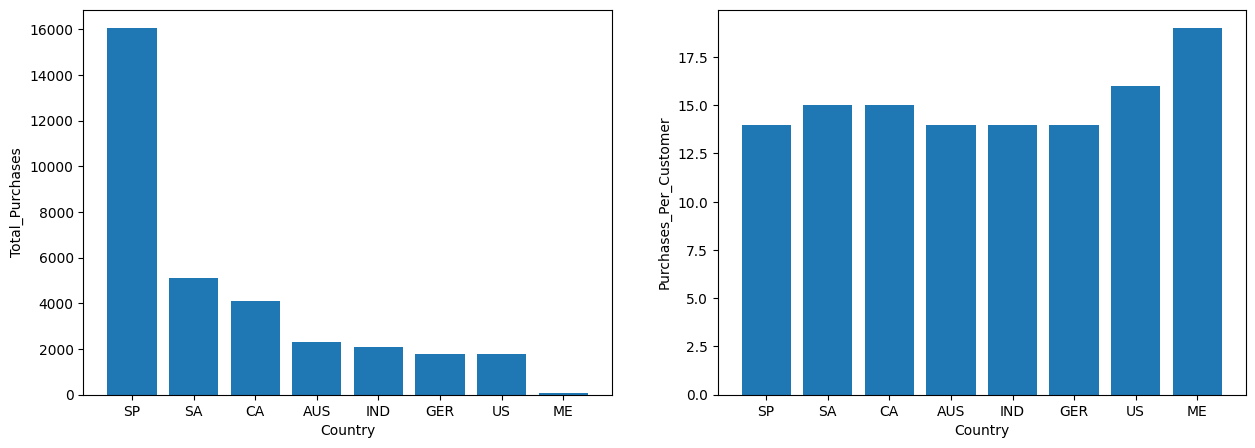

In [139]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(x = average_purchases_per_country['Country'], 
        height = average_purchases_per_country['Total_Purchases'])
ax1.set_xlabel('Country', fontsize=10)
ax1.set_ylabel('Total_Purchases', fontsize='medium') 

ax2.bar(x = average_purchases_per_country['Country'],
       height = average_purchases_per_country['Purchases_Per_Customer'])
ax2.set_xlabel('Country', fontsize=10)
ax2.set_ylabel('Purchases_Per_Customer', fontsize='medium') 

plt.show()

In terms of total number of purchases, USA doesn't seem to be in a good position. In fact it is the lowest (excluding ME due to only 3 records). However if we look at the purchases made per person in a country, then USA tops the chart.

#### 8. Use appropriate visualization to help analyze the following:

#### a. Identify the top-performing products and those with the lowest revenue

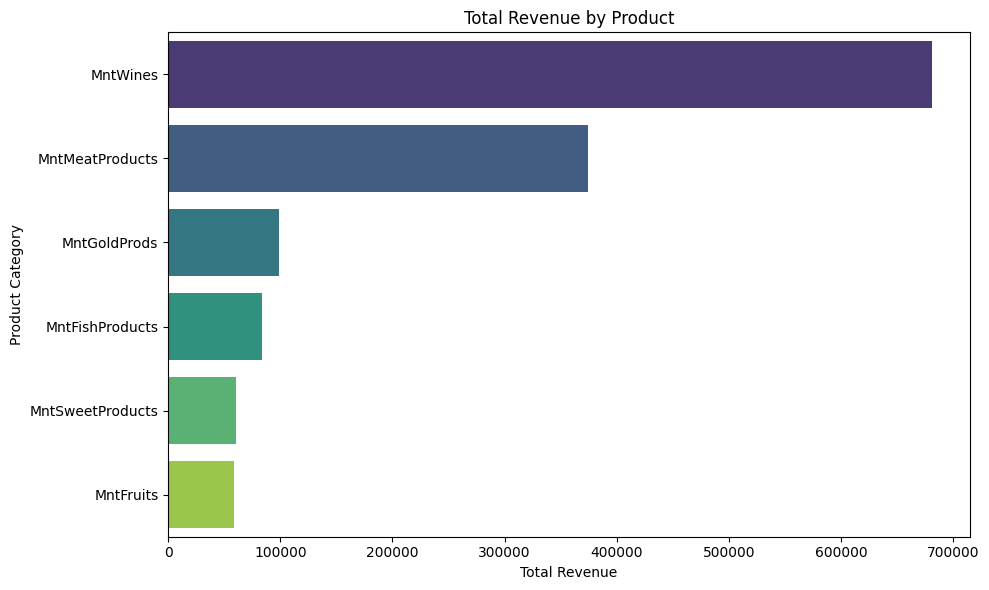

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('marketing_data.csv')

# Clean and preprocess
df['Income'] = df[' Income '].replace('[\$,]', '', regex=True).astype(float)

# Create Total_Expenditure column
mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds']
df['Total_Expenditure'] = df[mnt_cols].sum(axis=1)

# Add Age column
df['Age'] = 2025 - df['Year_Birth']

# Add Total_Kids column
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']


product_totals = df[mnt_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_totals.values, y=product_totals.index, palette='viridis')
plt.title('Total Revenue by Product')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

#### b. Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.

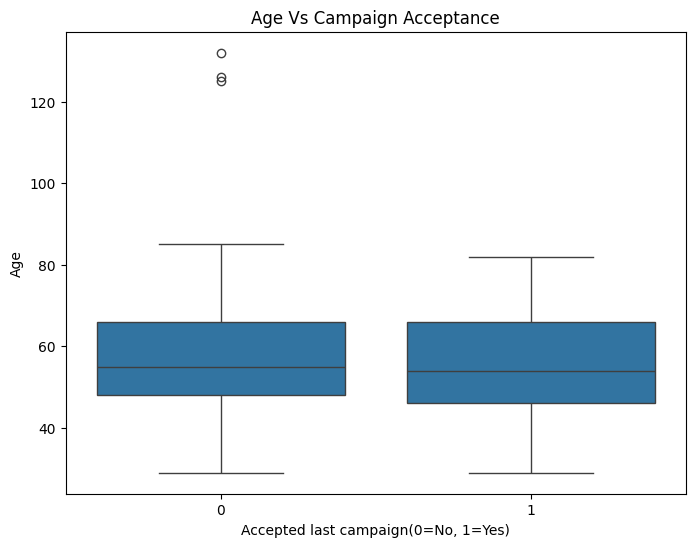

In [141]:
plt.figure(figsize=(8,6))
sn.boxplot(x='Response', y='Age', data=df)
plt.title('Age Vs Campaign Acceptance')
plt.xlabel('Accepted last campaign(0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

#### c. Country with highest campaign acceptance

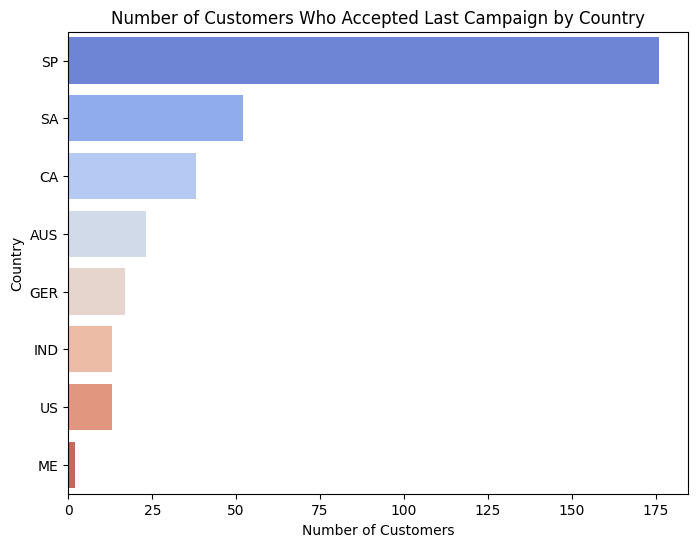

In [143]:
response_by_country = df[df['Response']==1]['Country'].value_counts()
plt.figure(figsize=(8,6))
sn.barplot(x=response_by_country, y=response_by_country.index, palette='coolwarm')
plt.title('Number of Customers Who Accepted Last Campaign by Country')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()

#### d. Number of children vs total expenditure

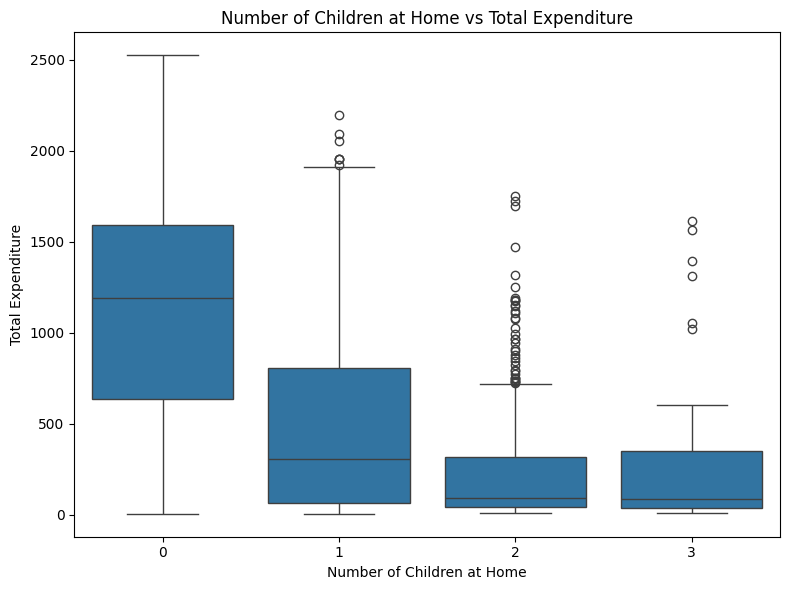

In [144]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Total_Kids', y='Total_Expenditure', data=df)
plt.title('Number of Children at Home vs Total Expenditure')
plt.xlabel('Number of Children at Home')
plt.ylabel('Total Expenditure')
plt.tight_layout()
plt.show()

#### e. Educational background of customers who complained

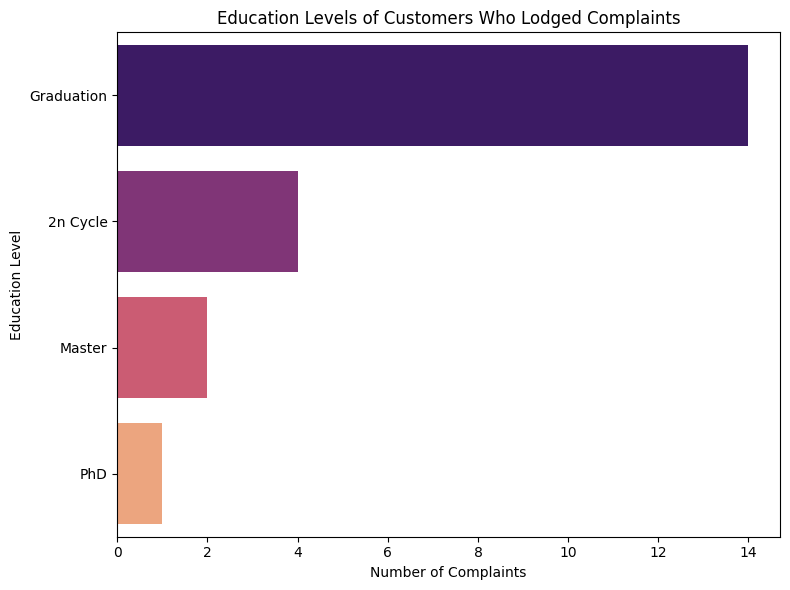

In [145]:
complaints_by_education = df[df['Complain'] == 1]['Education'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=complaints_by_education.values, y=complaints_by_education.index, palette='magma')
plt.title('Education Levels of Customers Who Lodged Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()